In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dt = pd.read_excel("house_price_dống-da.xlsx", encoding = "ISO-8859-1")
dt['1m2']=dt['price']/dt['area']
dt.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,1m2
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583,294.000000
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105,357.142857
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111,73.684211
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011,177.419355
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230,514.285714


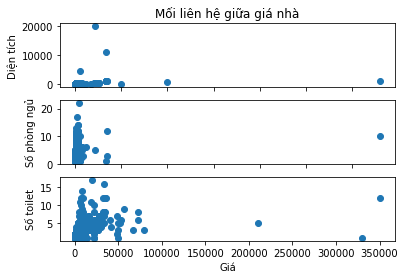

In [4]:
# Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.
fig1,axes=plt.subplots(3,1)
axes[0].scatter(dt['price'],dt['area'],label='area')
axes[1].scatter(dt['price'],dt['bedroom'],label='bedroom')
axes[2].scatter(dt['price'],dt['toilet'],label='toilet')
axes[0].set_title('Mối liên hệ giữa giá nhà')
axes[2].set_xlabel('Giá')
axes[0].set_ylabel('Diện tích')
axes[1].set_ylabel('Số phòng ngủ')
axes[2].set_ylabel('Số toilet')

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])

plt.show()

In [5]:
dt['type_of_land'].unique()

array(['Bán nhà riêng\n ', 'Bán nhà mặt phố\n ', 'Tập thể, cư xá',
       'Bán nhà riêng', 'Bán nhà mặt phố', 'Chung cư',
       'Bất động sản khác', 'Bất động sản khác\n ', 'Đất thổ cư'],
      dtype=object)

In [6]:
dt.loc[dt.loc[:,'type_of_land']=='Bán nhà mặt phố\n ','type_of_land']='Bán nhà mặt phố'
dt.loc[dt.loc[:,'type_of_land']=='Bán nhà riêng\n ','type_of_land']='Bán nhà riêng'
dt.loc[dt.loc[:,'type_of_land']=='Bất động sản khác\n ','type_of_land']='Bất động sản khác'
dt['type_of_land'].unique()

array(['Bán nhà riêng', 'Bán nhà mặt phố', 'Tập thể, cư xá', 'Chung cư',
       'Bất động sản khác', 'Đất thổ cư'], dtype=object)

Text(0, 0.5, '1m2')

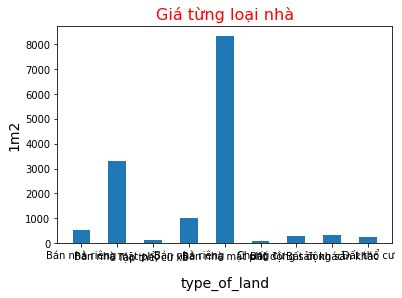

In [24]:
# Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).
plt.bar(dt['type_of_land'], dt['1m2'], width = 0.5)
plt.title('Giá từng loại nhà' , fontsize = 16, color = 'r')
plt.xlabel('type_of_land', fontsize = 14)
plt.ylabel('1m2', fontsize = 14)

In [8]:
dt2=dt.loc[:,{'type_of_land','price'}]
dt2

,type_of_land,price
0,Bán nhà riêng,14700.0
1,Bán nhà mặt phố,12500.0
2,Bán nhà riêng,4200.0
3,Bán nhà riêng,11000.0
4,Bán nhà mặt phố,36000.0
5,Bán nhà mặt phố,13500.0
6,Bán nhà mặt phố,13000.0
7,Bán nhà riêng,2900.0
8,Bán nhà riêng,3950.0
9,Bán nhà riêng,8900.0


In [13]:
dt2['type_of_land'].unique()

array(['Bán nhà riêng', 'Bán nhà mặt phố', 'Tập thể, cư xá', 'Chung cư',
       'Bất động sản khác', 'Đất thổ cư'], dtype=object)

In [18]:
al=dt2[dt2['type_of_land']=='Bán nhà riêng']
nr=al['price'].sum()
kl=dt2[dt2['type_of_land']=='Bán nhà mặt phố']
mp=kl['price'].sum()
jl=dt2[dt2['type_of_land']=='Tập thể, cư xá']
tt=jl['price'].sum()
ml=dt2[dt2['type_of_land']=='Chung cư']
cc=ml['price'].sum()
nl=dt2[dt2['type_of_land']=='Bất động sản khác']
bđs=nl['price'].sum()
bl=dt2[dt2['type_of_land']=='Đất thổ cư']
đtc=bl['price'].sum()
p = [nr,mp,tt,cc,bđs,đtc]
ar = ['Bán nhà riêng', 'Bán nhà mặt phố', 'Tập thể, cư xá', 'Chung cư',
       'Bất động sản khác', 'Đất thổ cư']
dt3=pd.DataFrame()
dt3['X']=ar
dt3['Y']=p
dt3

,X,Y
0,Bán nhà riêng,4591556.6
1,Bán nhà mặt phố,15455939.9
2,"Tập thể, cư xá",144530.0
3,Chung cư,118700.0
4,Bất động sản khác,400800.0
5,Đất thổ cư,84680.0


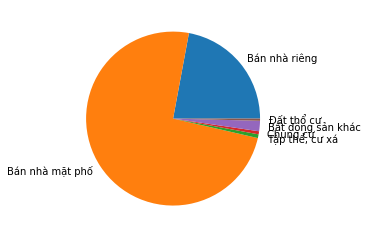

In [19]:
# Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).
plt.pie(dt3.iloc[:,1], labels = dt3.iloc[:,0])
plt.show()

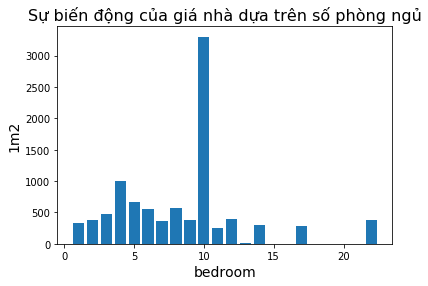

In [25]:
# Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ.
plt.bar(dt['bedroom'], dt['1m2'])
plt.title('Sự biến động của giá nhà dựa trên số phòng ngủ', fontsize = 16)
plt.xlabel('bedroom', fontsize = 14)
plt.ylabel('1m2', fontsize = 14)
plt.show()